In [2]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [4]:
# Load the Spotify songs CSV file
spotify = pd.read_csv("spotify_songs.csv")

In [6]:
X = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]

# Add a constant
X = sm.add_constant(X)

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(np.ravel(spotify[['playlist_genre']]))

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=46)

In [8]:
logreg = LogisticRegression() # Create the logistic regression model

logreg.fit(X_train, y_train) # Train the model

y_pred = logreg.predict(X_test) # Make predictions with test data

In [10]:
# Calculate accuracy and print results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.4571341556266179


In [12]:
# Code to plot the confusion matrix
classnames = spotify['playlist_genre'].unique()
confusion_matrix = confusion_matrix(y_test, y_pred)

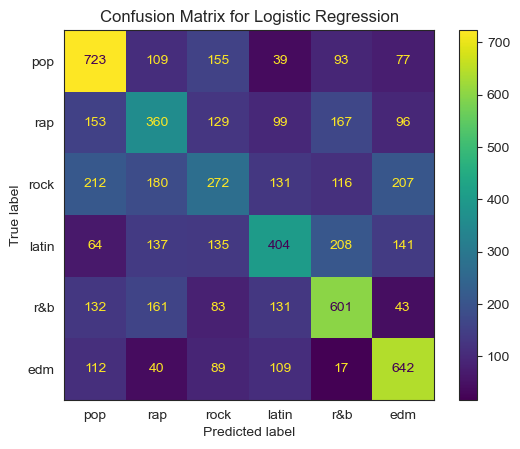

In [14]:
sns.set_style("white") # Set plot style
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classnames)
cm_display.plot()
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [16]:
# Generate the classification report
report = classification_report(y_test, y_pred, target_names=classnames)
print(report)

              precision    recall  f1-score   support

         pop       0.52      0.60      0.56      1196
         rap       0.36      0.36      0.36      1004
        rock       0.32      0.24      0.27      1118
       latin       0.44      0.37      0.40      1089
         r&b       0.50      0.52      0.51      1151
         edm       0.53      0.64      0.58      1009

    accuracy                           0.46      6567
   macro avg       0.45      0.46      0.45      6567
weighted avg       0.45      0.46      0.45      6567

